# Importing and Reading Files

In [541]:
import geopy 
from geopy.geocoders import Nominatim 
import time
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

#method = 'box-cox' or 'yeo-johnson'
from sklearn import preprocessing


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [542]:
#main housing data
df = pd.read_csv('data/kc_house_data.csv')

In [543]:
## Do an inner join and groupby on this
#first import zipcode csv from king co website
dfz = pd.read_csv('data/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv')

# Preliminary Exploration and Data Cleaning

In [544]:
df[df.duplicated(keep=False)].sort_values(by='address').head()
#checking for duplicated rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [545]:
# all zip codes for King County
# source : https://www.zillow.com/browse/homes/wa/king-county/
KCoZips =  [98052, 98092, 98115, 98103, 98003, 98023, 98105, 98042, 98034, 98133, 98118, 98125, 98058, 
            98031, 98122, 98033, 98032, 98004, 98059, 98001, 98006, 98056, 98030, 98155, 98168, 98117, 
            98002, 98198, 98038, 98029, 98027, 98109, 98074, 98144, 98007, 98040, 98072, 98146, 98011, 
            98107, 98106, 98188, 98008, 98178, 98108, 98075, 98028, 98112, 98119, 98055, 98053, 98102, 
            98022, 98126, 98116, 98005, 98121, 98199, 98177, 98166, 98136, 98045, 98077, 98101, 98057,
            98065, 98104, 98019, 98148, 98014, 98354, 98070, 98010, 98024, 98051, 98047, 98151, 98251,
            98134, 98039, 98195, 98158, 98154, 98161, 98174, 98068, 98256, 98288, 98050, 98132, 98171,
            98184, 98054, 98164, 98181, 98224, 98191, 98009, 98013, 98015, 98025, 98035, 98041, 98062, 
            98064, 98063, 98071, 98073, 98083, 98089, 98093, 98111, 98113, 98114, 98124, 98127, 98131, 
            98129, 98139, 98138, 98141, 98145, 98160, 98165, 98170, 98175, 98185, 98190, 98194, 98471,
            98481]

In [546]:
#amount of zip cods for king county
len(KCoZips)

131

In [547]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [548]:
# looking at the imported zipcodes csv file
dfz.info()
# so we need to convert the zipcode from df to an integer in order to merge with dfz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        209 non-null    int64  
 1   ZIP             209 non-null    int64  
 2   ZIPCODE         209 non-null    int64  
 3   COUNTY          209 non-null    int64  
 4   ZIP_TYPE        209 non-null    object 
 5   COUNTY_NAME     209 non-null    object 
 6   PREFERRED_CITY  209 non-null    object 
 7   Shape_Length    209 non-null    float64
 8   Shape_Area      209 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 14.8+ KB


In [549]:
# creating zipcodes column by slicing the address column
df['zipcodes'] = df['address'].apply(lambda x: x[-20:-15])

In [550]:
# zipcodes in King Co imported table in integer format, but string in our dataframe
# need to convert zipcode column into integer
df['zipcodes'] = df['zipcodes'].apply(lambda x: int(x))

In [551]:
df['zipcodes'].value_counts()

98042    992
98038    858
98115    761
98103    761
98117    748
        ... 
62204      1
68862      1
85207      1
99202      1
34470      1
Name: zipcodes, Length: 399, dtype: int64

In [552]:
# removing zip codes that are not in King County
# data from king county GIS included surrounding areas
df = df[df['zipcodes'].isin(KCoZips)]

In [553]:
# only including the relevant columns from GIS dataset
dfz = dfz[['ZIPCODE', 'PREFERRED_CITY']]

In [554]:
# checking the rows before merge
df.shape

(29215, 26)

In [555]:
# mergeeeee
df = df.merge(dfz, how = 'left', left_on = 'zipcodes', right_on = 'ZIPCODE')

In [556]:
# WE REDUCED OUR CATEGORICALS TO 40 FROM 400

In [557]:
# checking rows and nulls after merge and dropna
df = df.dropna()
df.info()
# there seems to be duplicate values since the values went up

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31737 entries, 0 to 31781
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              31737 non-null  int64  
 1   date            31737 non-null  object 
 2   price           31737 non-null  float64
 3   bedrooms        31737 non-null  int64  
 4   bathrooms       31737 non-null  float64
 5   sqft_living     31737 non-null  int64  
 6   sqft_lot        31737 non-null  int64  
 7   floors          31737 non-null  float64
 8   waterfront      31737 non-null  object 
 9   greenbelt       31737 non-null  object 
 10  nuisance        31737 non-null  object 
 11  view            31737 non-null  object 
 12  condition       31737 non-null  object 
 13  grade           31737 non-null  object 
 14  heat_source     31737 non-null  object 
 15  sewer_system    31737 non-null  object 
 16  sqft_above      31737 non-null  int64  
 17  sqft_basement   31737 non-null 

In [558]:
#checking for duplicates specifically
df[df.duplicated(keep=False)].sort_values(by='address').shape

(5126, 28)

In [559]:
# dropping duplicates
# df = df.dropna()
df = df.drop_duplicates(subset=['address'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29015 entries, 0 to 31781
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29015 non-null  int64  
 1   date            29015 non-null  object 
 2   price           29015 non-null  float64
 3   bedrooms        29015 non-null  int64  
 4   bathrooms       29015 non-null  float64
 5   sqft_living     29015 non-null  int64  
 6   sqft_lot        29015 non-null  int64  
 7   floors          29015 non-null  float64
 8   waterfront      29015 non-null  object 
 9   greenbelt       29015 non-null  object 
 10  nuisance        29015 non-null  object 
 11  view            29015 non-null  object 
 12  condition       29015 non-null  object 
 13  grade           29015 non-null  object 
 14  heat_source     29015 non-null  object 
 15  sewer_system    29015 non-null  object 
 16  sqft_above      29015 non-null  int64  
 17  sqft_basement   29015 non-null 

# Data Exploration Base Model

In [560]:
X = df.drop(columns = ['price'])
y = df['price']

In [561]:
X.corr()

/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_16171/1968499000.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcodes,ZIPCODE
id,1.000000,-0.006043,-0.013962,-0.028218,-0.121127,0.032791,-0.022402,-0.016232,-0.007142,-0.043077,0.020605,-0.028657,-0.001818,0.009800,-0.004192,-0.004192
bedrooms,-0.006043,1.000000,0.594510,0.629503,-0.000756,0.206114,0.536092,0.234312,0.302579,0.193138,0.188908,0.010440,-0.017253,0.130621,-0.159889,-0.159889
bathrooms,-0.013962,0.594510,1.000000,0.780958,0.038990,0.433211,0.681687,0.260994,0.461847,0.334317,0.457914,0.043147,0.045854,0.178014,-0.179152,-0.179152
sqft_living,-0.028218,0.629503,0.780958,1.000000,0.118097,0.368062,0.881266,0.335763,0.501736,0.407442,0.335366,0.035172,0.048289,0.230625,-0.191074,-0.191074
sqft_lot,-0.121127,-0.000756,0.038990,0.118097,1.000000,-0.018161,0.128033,0.001942,0.084134,0.157526,0.014437,0.007379,-0.073750,0.182678,-0.095724,-0.095724
floors,0.032791,0.206114,0.433211,0.368062,-0.018161,1.000000,0.518943,-0.241797,0.190244,0.124782,0.515694,-0.013332,0.043654,0.097289,-0.042282,-0.042282
sqft_above,-0.022402,0.536092,0.681687,0.881266,0.128033,0.518943,1.000000,-0.074724,0.552206,0.322274,0.435209,0.006848,-0.023563,0.335617,-0.262618,-0.262618
sqft_basement,-0.016232,0.234312,0.260994,0.335763,0.001942,-0.241797,-0.074724,1.000000,0.015415,0.214800,-0.225876,0.052351,0.189264,-0.223557,0.162453,0.162453
sqft_garage,-0.007142,0.302579,0.461847,0.501736,0.084134,0.190244,0.552206,0.015415,1.000000,0.229089,0.505586,-0.105415,-0.131351,0.374833,-0.360266,-0.360266
sqft_patio,-0.043077,0.193138,0.334317,0.407442,0.157526,0.124782,0.322274,0.214800,0.229089,1.000000,0.136616,0.058015,0.011563,0.122668,-0.106212,-0.106212


/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_16171/3980791441.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


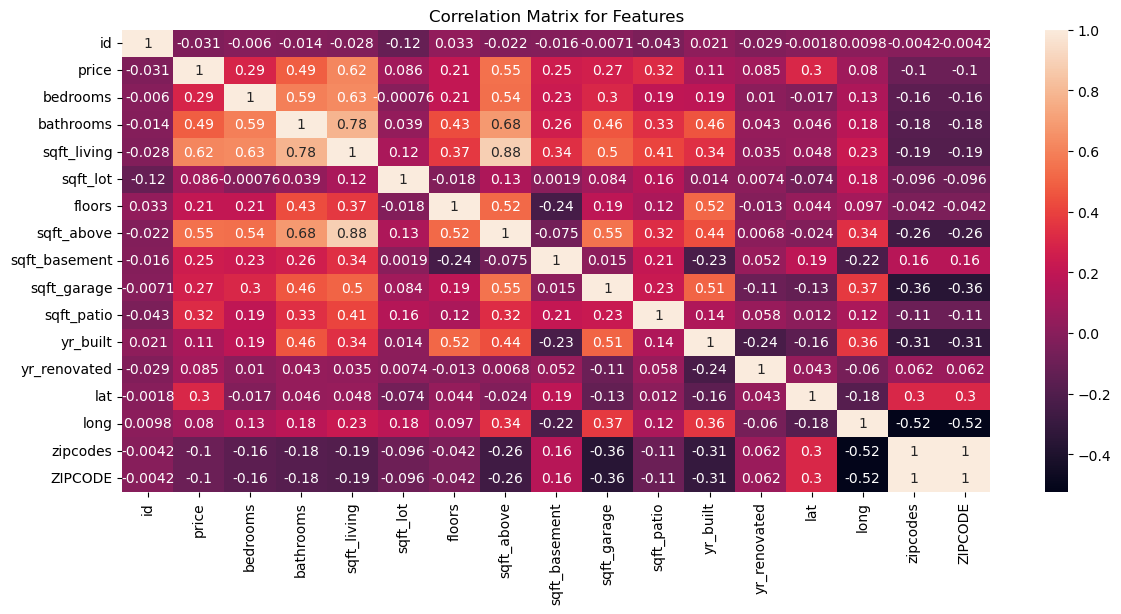

In [562]:
# using heat map to check correlations

plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

#we see sqft_living has the highest correlation to price

sns.pairplot(df)

<Axes: xlabel='sqft_living', ylabel='price'>

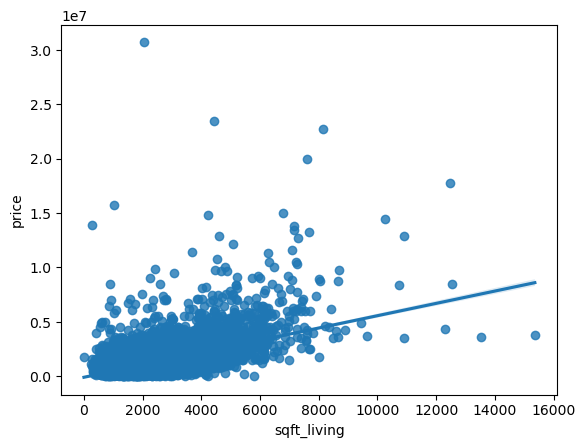

In [563]:
sns.regplot(x =df['sqft_living'],y = df['price'])

In [564]:
# THIS IS MY BASE MODEL

X = df[['sqft_living']]
y = df['price']

from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.3803731090091207

# Data Exploration

<Axes: xlabel='bedrooms', ylabel='Count'>

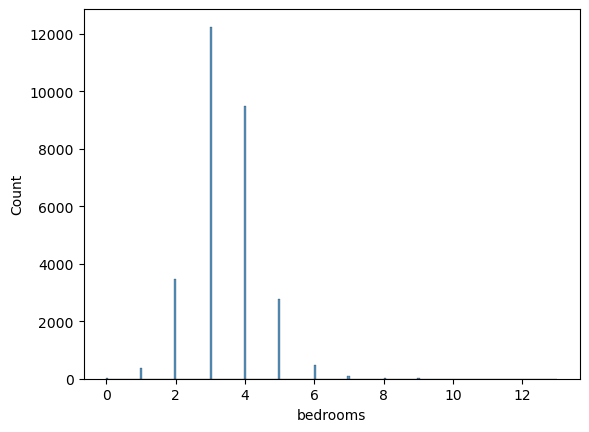

In [565]:
sns.histplot(data = df['bedrooms'])

In [566]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'zipcodes', 'ZIPCODE',
       'PREFERRED_CITY'],
      dtype='object')

In [567]:
df.groupby('PREFERRED_CITY')['sqft_living'].mean().sort_values(ascending=False)

PREFERRED_CITY
MEDINA           3703.813559
MERCER ISLAND    3316.750716
SAMMAMIISH       3170.058394
PRESTON          2790.000000
SAMMAMISH        2789.859485
WOODINVILLE      2753.785838
BELLEVUE         2753.561270
BLACK DIAMOND    2573.501597
ISSAQUAH         2567.539118
FALL CITY        2521.368421
REDMOND          2502.184183
RAVENSDALE       2470.000000
SNOQUALMIE       2464.760274
NORTH BEND       2433.297414
BOTHELL          2362.289575
DUVALL           2312.381148
KIRKLAND         2312.145062
KENMORE          2276.060519
CARNATION        2254.967949
MAPLE VALLEY     2226.962617
RENTON           2147.892019
KENT             2050.273644
AUBURN           2040.702194
FEDERAL WAY      2002.084581
ENUMCLAW         1943.341357
VASHON           1849.439791
SEATTLE          1841.520839
MILTON           1804.478261
PACIFIC          1608.012987
SKYKOMISH        1419.375000
GOLD BAR         1273.333333
BARING            890.000000
Name: sqft_living, dtype: float64

In [568]:
dfsqft = df.groupby('PREFERRED_CITY')['bathrooms'].mean().sort_values(ascending=False)

In [569]:
dfhistsqft.head(6)

PREFERRED_CITY
MEDINA           3.372881
MERCER ISLAND    3.186246
SAMMAMIISH       3.000000
SAMMAMISH        2.849765
BELLEVUE         2.802857
ISSAQUAH         2.748222
Name: bathrooms, dtype: float64

In [570]:
dfsqft_lot = df1.groupby('PREFERRED_CITY')['sqft_lot'].mean().sort_values(ascending=False)

In [571]:
dfsqft_lot.head(6)

PREFERRED_CITY
RAVENSDALE    149013.833333
FALL CITY      95806.745614
VASHON         92571.089005
CARNATION      79717.883117
ENUMCLAW       68958.151648
DUVALL         57428.762295
Name: sqft_lot, dtype: float64

Text(0.5, 0, 'PREFERRED_CITY')

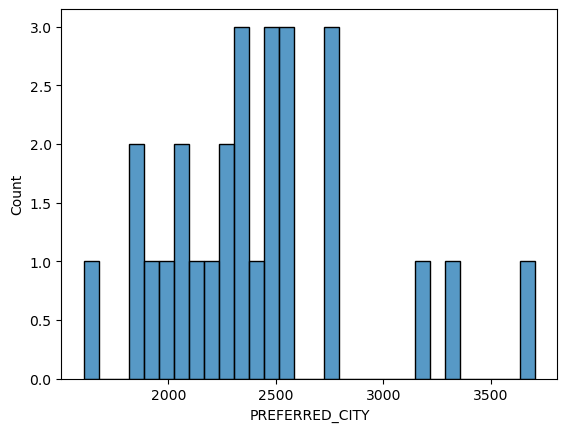

In [572]:
sns.histplot(data = dfhist, bins= 30)
plt.xlabel('PREFERRED_CITY')

In [573]:

# regex=None,

In [574]:
df.PREFERRED_CITY.value_counts()

SEATTLE          11829
RENTON            2130
KENT              2083
AUBURN            1595
BELLEVUE          1575
KIRKLAND          1296
FEDERAL WAY       1135
REDMOND            961
MAPLE VALLEY       856
ISSAQUAH           703
WOODINVILLE        579
NORTH BEND         464
ENUMCLAW           457
SAMMAMISH          427
SAMMAMIISH         411
MERCER ISLAND      349
KENMORE            347
BLACK DIAMOND      313
SNOQUALMIE         292
BOTHELL            259
DUVALL             244
VASHON             191
CARNATION          156
FALL CITY          114
PACIFIC             77
RAVENSDALE          66
MEDINA              59
MILTON              23
SKYKOMISH           16
GOLD BAR             3
BARING               3
PRESTON              2
Name: PREFERRED_CITY, dtype: int64

In [575]:
dfMED = df[df['PREFERRED_CITY'].isin(['MEDINA'])]
dfMERC = df[df['PREFERRED_CITY'].isin(['MEDINA'])]
dfBELLE = df[df['PREFERRED_CITY'].isin(['BELLEVUE'])]
dfSAM = df[df['PREFERRED_CITY'].isin(['SAMMAMISH'])]
dfKIRK = df[df['PREFERRED_CITY'].isin(['KIRKLAND'])]
dfKENT = df[df['PREFERRED_CITY'].isin(['KENT'])]
dfRED = df[df['PREFERRED_CITY'].isin(['REDMOND'])]
dfWOOD = df[df['PREFERRED_CITY'].isin(['WOODINVILLE'])]
dfFALL = df[df['PREFERRED_CITY'].isin(['FALL CITY'])]
dfFED = df[df['PREFERRED_CITY'].isin(['FEDERAL WAY'])]
dfAUB = df[df['PREFERRED_CITY'].isin(['AUBURN'])]
dfRENT = df[df['PREFERRED_CITY'].isin(['RENT'])]

In [ ]:
dfMED.sqft_living.value_counts()
dfMERC 
dfBELLE
dfSAM 
dfKIRK 
dfKENT 
dfRED 
dfWOOD
dfFALL 
dfFED 
dfAUB
dfRENT

In [299]:
dfMED[dfMED['sqft_living'] > 2000].shape

(48, 39)

In [576]:
dfprefcityprices = df.groupby('PREFERRED_CITY')['price'].mean().sort_values(ascending=False)

In [577]:
dfprefcityprices

PREFERRED_CITY
MEDINA           5.319170e+06
MERCER ISLAND    2.761960e+06
BELLEVUE         2.149155e+06
SAMMAMIISH       1.903189e+06
SAMMAMISH        1.707086e+06
KIRKLAND         1.640557e+06
PRESTON          1.600500e+06
REDMOND          1.563663e+06
WOODINVILLE      1.550504e+06
FALL CITY        1.539561e+06
ISSAQUAH         1.462132e+06
BOTHELL          1.202928e+06
SNOQUALMIE       1.173838e+06
KENMORE          1.083541e+06
NORTH BEND       1.062900e+06
SEATTLE          1.016644e+06
VASHON           9.884233e+05
CARNATION        9.740629e+05
DUVALL           9.723781e+05
RAVENSDALE       9.540643e+05
RENTON           8.823328e+05
BLACK DIAMOND    8.342228e+05
MAPLE VALLEY     8.072041e+05
ENUMCLAW         6.485286e+05
KENT             6.477059e+05
AUBURN           6.245891e+05
FEDERAL WAY      6.138539e+05
MILTON           5.741593e+05
GOLD BAR         5.153000e+05
PACIFIC          4.929118e+05
SKYKOMISH        4.572688e+05
BARING           2.546667e+05
Name: price, dtype: float

In [578]:
dfpcp = df.merge(dfprefcityprices, how = 'left', left_on = 'PREFERRED_CITY', right_on = 'PREFERRED_CITY')

In [579]:
dfpcp = dfpcp.dropna()
dfpcp = dfpcp.drop_duplicates(subset=['address'])

In [580]:
dfpcp

,id,date,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcodes,ZIPCODE,PREFERRED_CITY,price_y
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,98055,RENTON,8.823328e+05
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,98133,SEATTLE,1.016644e+06
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,98178,SEATTLE,1.016644e+06
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,98118,SEATTLE,1.016644e+06
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,98027,ISSAQUAH,1.462132e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29010,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,98103,SEATTLE,1.016644e+06
29011,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,98116,SEATTLE,1.016644e+06
29012,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,98122,SEATTLE,1.016644e+06
29013,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,98055,RENTON,8.823328e+05


In [581]:
dfpcp.to_csv('df_meaner_price', sep='\t')

In [582]:
(df['PREFERRED_CITY'] == 'PRESTON').value_counts()

False    29013
True         2
Name: PREFERRED_CITY, dtype: int64

In [583]:
df.shape

(29015, 28)

# Data Cleaning and Transformation

In [584]:
# checking value counts by city to look for outliers to drop
df['PREFERRED_CITY'].value_counts()

SEATTLE          11829
RENTON            2130
KENT              2083
AUBURN            1595
BELLEVUE          1575
KIRKLAND          1296
FEDERAL WAY       1135
REDMOND            961
MAPLE VALLEY       856
ISSAQUAH           703
WOODINVILLE        579
NORTH BEND         464
ENUMCLAW           457
SAMMAMISH          427
SAMMAMIISH         411
MERCER ISLAND      349
KENMORE            347
BLACK DIAMOND      313
SNOQUALMIE         292
BOTHELL            259
DUVALL             244
VASHON             191
CARNATION          156
FALL CITY          114
PACIFIC             77
RAVENSDALE          66
MEDINA              59
MILTON              23
SKYKOMISH           16
GOLD BAR             3
BARING               3
PRESTON              2
Name: PREFERRED_CITY, dtype: int64

In [585]:
# dropping 5 cities with least value counts
citylist = ['MILTON', 'SKYKOMISH', 'BARING', 'GOLD BAR', 'PRESTON']
df = df[~df['PREFERRED_CITY'].isin(citylist)]

In [586]:
# dropping any rows that have a sqft lot of over 800k
df = df[df['sqft_lot'] < 1000000]

In [587]:
df['ysb'] = 2023 - df['yr_built']

In [588]:
df['ysr'] = 2023 - df['yr_built']

In [589]:
df['RecentlyBuiltorRenovated'] = (df['ysb'] < 20) | (df['ysr'] < 10)

In [590]:
df['date'] = pd.to_datetime(df['date'])

In [591]:
df['month_sold'] = df['date'].dt.month

In [592]:
df['yr_built_or_renovated'] = df.apply(lambda row: row['yr_renovated'] if row['yr_renovated'] != 0 else row['yr_built'], axis=1)

In [593]:
df['hasbasement'] = df['sqft_basement'] != 0

In [594]:
df['hasbasement'].value_counts()

False    15028
True     13928
Name: hasbasement, dtype: int64

In [595]:
df['bedtobath'] = df['bedrooms'] * df['bathrooms']

In [596]:
df['bedtosqftliving'] = df['bedrooms'] * df['sqft_living']
df['bathroomstosqftliving'] = df['bathrooms'] * df['sqft_living']
df['yrbuilttobathroom'] =  df['yr_built'] * df['bathrooms']
df['floorstoyrbuilt'] = df['floors'] * df['yr_built']

In [597]:
df['sewer_system'].value_counts()

PUBLIC                24652
PRIVATE                4297
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

In [598]:
df = df[df['sewer_system'].isin(['PUBLIC','PRIVATE'])]

# Ordinal Encoding

In [599]:
df['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [600]:
df['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [601]:
df['view'].unique()

array(['NONE', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD'], dtype=object)

In [602]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [603]:
df['nuisance'].unique()

array(['NO', 'YES'], dtype=object)

In [604]:
df['greenbelt'].unique()

array(['NO', 'YES'], dtype=object)

In [605]:
df['RecentlyBuiltorRenovated'].unique()

array([False,  True])

In [606]:
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['view'] = df['view'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['nuisance'] = df['nuisance'].astype('category')
df['greenbelt'] = df['greenbelt'].astype('category')
df['RecentlyBuiltorRenovated'] = df['RecentlyBuiltorRenovated'].astype('category')

In [607]:
df['condition'] = df['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average','Good', 'Very Good'])
df['grade'] = df['grade'].cat.reorder_categories(['2 Substandard', '3 Poor', '4 Low', '5 Fair', 
                                                  '6 Low Average', '7 Average', '8 Good', '9 Better',
                                                  '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
df['view'] = df['view'].cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])
df['waterfront'] = df['waterfront'].cat.reorder_categories(['NO', 'YES'])
df['nuisance'] = df['nuisance'].cat.reorder_categories(['NO', 'YES'])
df['greenbelt'] = df['greenbelt'].cat.reorder_categories(['NO', 'YES'])
df['RecentlyBuiltorRenovated'] = df['RecentlyBuiltorRenovated'].cat.reorder_categories([False, True])

In [608]:
print(df['grade'].cat.codes)
print(df['condition'].cat.codes)
print(df['view'].cat.codes)
print(df['waterfront'].cat.codes)
print(df['nuisance'].cat.codes)
print(df['greenbelt'].cat.codes)
print(df['RecentlyBuiltorRenovated'].cat.codes)

0        5
1        5
2        5
3        7
4        5
        ..
31777    6
31778    5
31779    5
31780    6
31781    5
Length: 28949, dtype: int8
0        3
1        2
2        2
3        2
4        2
        ..
31777    3
31778    2
31779    2
31780    2
31781    2
Length: 28949, dtype: int8
0        0
1        2
2        2
3        2
4        0
        ..
31777    0
31778    1
31779    0
31780    0
31781    0
Length: 28949, dtype: int8
0        0
1        0
2        0
3        0
4        0
        ..
31777    0
31778    0
31779    0
31780    0
31781    0
Length: 28949, dtype: int8
0        0
1        1
2        0
3        0
4        1
        ..
31777    0
31778    0
31779    1
31780    0
31781    0
Length: 28949, dtype: int8
0        0
1        0
2        0
3        0
4        0
        ..
31777    0
31778    0
31779    0
31780    0
31781    0
Length: 28949, dtype: int8
0        0
1        0
2        0
3        1
4        1
        ..
31777    0
31778    1
31779    0
31780    1
31

In [609]:
ord_cat_selector = ['condition', 'grade', 'view', 'waterfront', 'nuisance', 'greenbelt', 'RecentlyBuiltorRenovated']
cat_subset = df[ord_cat_selector]
grade_ls = ['2 Substandard', '3 Poor', '4 Low', '5 Fair', 
            '6 Low Average', '7 Average', '8 Good', '9 Better',
            '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
cond_ls = ['Poor', 'Fair', 'Average','Good', 'Very Good']
view_ls = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
wf_ls = ['NO', 'YES']
nuisance_ls = ['NO', 'YES']
gb_ls = ['NO', 'YES']
RBoR = [False, True]
o_enc = OrdinalEncoder(categories = [cond_ls, grade_ls, view_ls, wf_ls, nuisance_ls, gb_ls, RBoR])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['2 Substandard', '3 Poor', '4 Low', '5 Fair',
                            '6 Low Average', '7 Average', '8 Good', '9 Better',
                            '10 Very Good', '11 Excellent', '12 Luxury',
                            '13 Mansion'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'],
                           ['NO', 'YES'], ['NO', 'YES'], ['NO', 'YES'],
                           [False, True]])

In [610]:
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)

In [611]:
o_enc.inverse_transform(X_subset)

array([['Good', '7 Average', 'NONE', ..., 'NO', 'NO', 0.0],
       ['Average', '7 Average', 'AVERAGE', ..., 'YES', 'NO', 0.0],
       ['Average', '7 Average', 'AVERAGE', ..., 'NO', 'NO', 0.0],
       ...,
       ['Average', '7 Average', 'NONE', ..., 'YES', 'NO', 0.0],
       ['Average', '8 Good', 'NONE', ..., 'NO', 'NO', 1.0],
       ['Average', '7 Average', 'NONE', ..., 'NO', 'NO', 0.0]],
      dtype=object)

In [612]:
X_subset = X_subset.rename(columns = {'condition': 'house_cond','grade':'grade2', 
                                      'view':'view2', 'waterfront': 'wf2', 
                                      'nuisance':'nuisance2', 'greenbelt': 'greenbelt2', 'RecentlyBuiltorRenovated' : 'RBoR2'}) 

In [613]:
df1 = pd.concat([df.reset_index(), X_subset], axis =1)

In [614]:
df1.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'zipcodes', 'ZIPCODE',
       'PREFERRED_CITY', 'ysb', 'ysr', 'RecentlyBuiltorRenovated',
       'month_sold', 'yr_built_or_renovated', 'hasbasement', 'bedtobath',
       'bedtosqftliving', 'bathroomstosqftliving', 'yrbuilttobathroom',
       'floorstoyrbuilt', 'house_cond', 'grade2', 'view2', 'wf2', 'nuisance2',
       'greenbelt2', 'RBoR2'],
      dtype='object')

# Test Train Split and LR Score

In [615]:
X = df[['sqft_living']]
y = df['price']

from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.38054160674507875

In [616]:
lr = LinearRegression()
lr

LinearRegression()

In [617]:
# removed id, price, ZIPCODE, address, lat, long
col_selector = ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 
                'yr_built', 'yr_renovated', 'zipcodes', 'nuisance2', 'view2', 'wf2', 'greenbelt2', 'RBoR2']
X = df1[col_selector]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# , random_state=21

In [618]:
lr.fit(X_train, y_train)

LinearRegression()

In [619]:
lr.score(X_train,y_train)

0.5026492755823218

# Nominal Encoding

In [620]:
df1['gradesquared'] = df1['grade2'] ** 2

In [621]:
df1['gradesquared'].head()

0    25.0
1    25.0
2    25.0
3    49.0
4    25.0
Name: gradesquared, dtype: float64

In [622]:
df1.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'zipcodes', 'ZIPCODE',
       'PREFERRED_CITY', 'ysb', 'ysr', 'RecentlyBuiltorRenovated',
       'month_sold', 'yr_built_or_renovated', 'hasbasement', 'bedtobath',
       'bedtosqftliving', 'bathroomstosqftliving', 'yrbuilttobathroom',
       'floorstoyrbuilt', 'house_cond', 'grade2', 'view2', 'wf2', 'nuisance2',
       'greenbelt2', 'RBoR2', 'gradesquared'],
      dtype='object')

In [623]:
col_selector = ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 
                'zipcodes', 'nuisance2', 'view2', 'wf2',  'floors', 'bedtobath',  'month_sold', 'yr_built_or_renovated', 'yr_built','RBoR2', 'greenbelt2',
                'hasbasement', 'gradesquared', 'heat_source']
X = df1[col_selector]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [624]:
print(len(X_train))
print(len(X_test))

20264
8685


In [625]:
numeric_cols= ['house_cond', 'sqft_living', 'sqft_above', 
                 'nuisance2', 'view2', 'wf2',  'floors', 'bathrooms', 'bedrooms',
                     'hasbasement', 'RBoR2','gradesquared'
              ]
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import MaxAbsScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import PowerTransformer



ss = preprocessing.StandardScaler()
mms = preprocessing.MinMaxScaler()
mas = preprocessing.MaxAbsScaler()
qts = preprocessing.QuantileTransformer()
ptbc = preprocessing.PowerTransformer(method = 'box-cox')
ptyj = preprocessing.PowerTransformer(method = 'yeo-johnson')
#method = 'box-cox' or 'yeo-johnson'

ss.fit(X_train[numeric_cols])

X_stan_train = ss.transform(X_train[numeric_cols])
X_stan_test = ss.transform(X_test[numeric_cols])

X_dfstan_train = pd.DataFrame(X_stan_train, columns = numeric_cols)
X_dfstan_test = pd.DataFrame(X_stan_test, columns = numeric_cols)
                              

In [626]:
X_dfstan_train.describe()

,house_cond,sqft_living,sqft_above,nuisance2,view2,wf2,floors,bathrooms,bedrooms,hasbasement,RBoR2,gradesquared
count,2.026400e+04,2.026400e+04,2.026400e+04,2.026400e+04,2.026400e+04,2.026400e+04,2.026400e+04,2.026400e+04,2.026400e+04,2.026400e+04,2.026400e+04,2.026400e+04
mean,1.118551e-16,6.101186e-17,3.576557e-17,2.524629e-17,-3.681750e-18,2.384372e-17,1.507764e-16,1.353482e-16,5.610286e-18,8.134915e-17,-2.735014e-17,-2.468526e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-3.496691e+00,-2.175341e+00,-2.075179e+00,-4.525000e-01,-3.474774e-01,-1.300451e-01,-9.405047e-01,-2.597250e+00,-3.522788e+00,-9.613655e-01,-5.244299e-01,-2.339023e+00
25%,-6.935283e-01,-7.055787e-01,-7.234245e-01,-4.525000e-01,-3.474774e-01,-1.300451e-01,-9.405047e-01,-3.632319e-01,-4.463012e-01,-9.613655e-01,-5.244299e-01,-5.735595e-01
50%,-6.935283e-01,-1.941791e-01,-2.796668e-01,-4.525000e-01,-3.474774e-01,-1.300451e-01,-1.985414e-02,1.952727e-01,-4.463012e-01,-9.613655e-01,-5.244299e-01,-5.735595e-01
75%,7.080532e-01,5.187119e-01,5.395782e-01,-4.525000e-01,-3.474774e-01,-1.300451e-01,9.007964e-01,7.537773e-01,5.791946e-01,1.040187e+00,-5.244299e-01,2.032443e-01
max,2.109635e+00,1.353179e+01,1.232760e+01,2.209945e+00,4.314080e+00,7.689640e+00,4.583399e+00,8.572842e+00,9.808656e+00,1.040187e+00,1.906832e+00,6.205819e+00


In [627]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [628]:
nominal_cols = ['zipcodes', 'month_sold', 'yr_built_or_renovated', 'heat_source']

In [629]:
ohe.fit(X_train[nominal_cols])
ohe_train = ohe.transform(X_train[nominal_cols])
ohe_test = ohe.transform(X_test[nominal_cols])


ohe_train= pd.DataFrame(ohe_train, columns = ohe.get_feature_names_out())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names_out())

/Users/forrestwilliams/anaconda3/envs/wheelydope/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


X_train_ohe =pd.concat([X_train.drop(columns = nominal_cols).reset_index(),
                        ohe_train],1)


X_test_ohe =pd.concat([X_test.drop(columns = nominal_cols).reset_index(),
                        ohe_test],1)

In [630]:
X_train_ohe =pd.concat([X_dfstan_train.reset_index(),
                        ohe_train],1)


X_test_ohe =pd.concat([X_dfstan_test.reset_index(),
                        ohe_test],1)

/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_16171/3032957121.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_train_ohe =pd.concat([X_dfstan_train.reset_index(),
/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_16171/3032957121.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_test_ohe =pd.concat([X_dfstan_test.reset_index(),


In [631]:
lr = LinearRegression()
lr.fit(X_train_ohe, y_train)

lr.score(X_test_ohe, y_test)
# lr.score(X_train_ohe, y_train)

0.6952527773117028

In [632]:
lr.coef_

array([-2.51069818e-01,  4.49749141e+04,  2.23998931e+05,  1.25960601e+05,
       -1.24165763e+04,  9.00886642e+04,  1.42346819e+05, -9.03365979e+04,
        5.73606392e+04, -5.78411307e+04, -2.45271228e+04, -9.65618388e+04,
        1.99523296e+05, -2.19143754e+12, -2.19143750e+12, -2.19143752e+12,
       -2.19143528e+12, -2.19143658e+12, -2.19143682e+12, -2.19143684e+12,
       -2.19143677e+12, -2.19143765e+12, -2.19143712e+12, -2.19143741e+12,
       -2.19143733e+12, -2.19143759e+12, -2.19143761e+12, -2.19143716e+12,
       -2.19143710e+12, -2.19143718e+12, -2.19143694e+12, -2.19143752e+12,
       -2.19143749e+12, -2.19143750e+12, -2.19143646e+12, -2.19143691e+12,
       -2.19143749e+12, -2.19143379e+12, -2.19143625e+12, -2.19143755e+12,
       -2.19143740e+12, -2.19143739e+12, -2.19143753e+12, -2.19143680e+12,
       -2.19143703e+12, -2.19143743e+12, -2.19143723e+12, -2.19143742e+12,
       -2.19143748e+12, -2.19143732e+12, -2.19143728e+12, -2.19143756e+12,
       -2.19143695e+12, -

In [633]:
import statsmodels.api as sm

# add a constant (intercept term) to the predictors
X_train_ohe = sm.add_constant(X_train_ohe)
X_test_ohe = sm.add_constant(X_test_ohe)

# reset the index of y_train
y_train_reset = y_train.reset_index(drop=True)

model = sm.OLS(y_train_reset, X_train_ohe)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     180.6
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:53:19   Log-Likelihood:            -2.9572e+05
No. Observations:               20264   AIC:                         5.919e+05
Df Residuals:                   20039   BIC:                         5.937e+05
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# Linear Regression Final Model 

In [155]:
lr

LinearRegression()

# Data Visualization

In [90]:
weights = results.params
weights

const                    690393.048366
index                        -0.243413
house_cond                45088.571920
sqft_living              224337.858115
sqft_above               126390.929752
                             ...      
heat_source_Gas           77537.877544
heat_source_Gas/Solar    183791.307590
heat_source_Oil           72629.638020
heat_source_Oil/Solar     17690.668461
heat_source_Other        159693.174276
Length: 231, dtype: float64

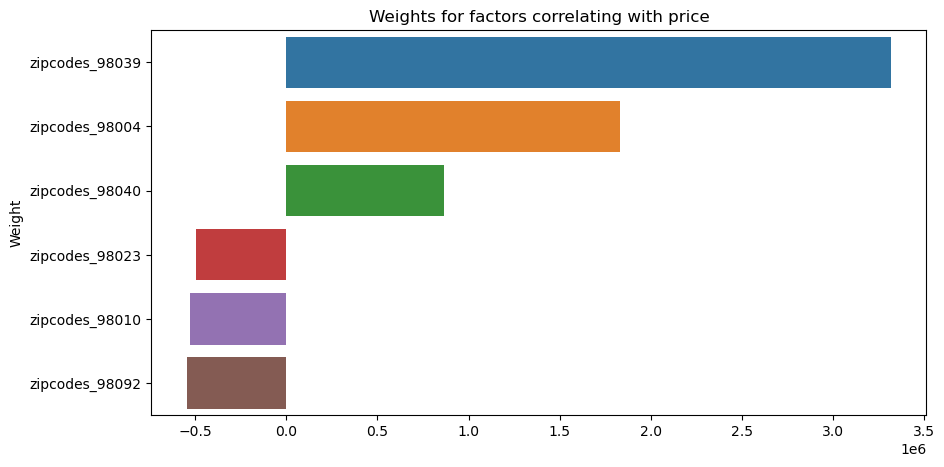

In [91]:
# sort the weights
sorted_weights = weights.sort_values(ascending=False)

# select top 10
top_10 = sorted_weights[:3]

# select bottom 10
bottom_10 = sorted_weights[-3:]

# concatenate top and bottom 10
selected_weights = pd.concat([top_10, bottom_10])

# plot
plt.figure(figsize=(10,5))
sns.barplot(y = selected_weights.index, x = selected_weights.values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()


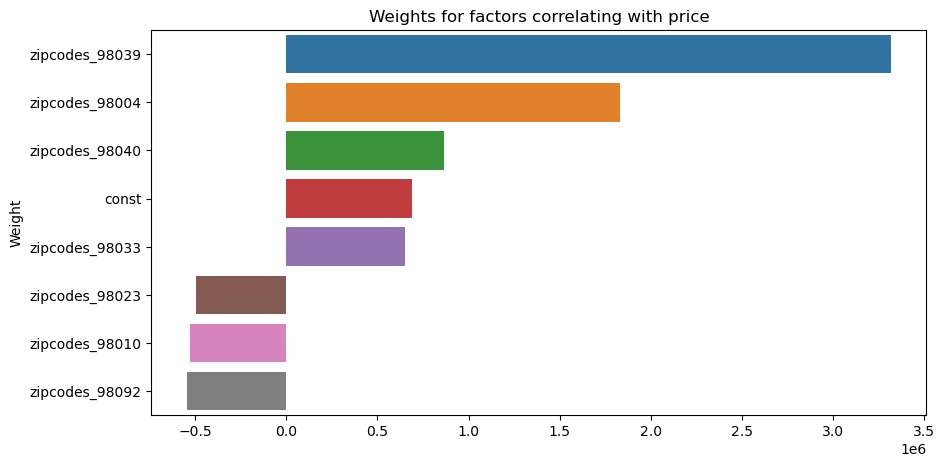

In [92]:
# sort the weights
sorted_weights = weights.sort_values(ascending=False)

# select top 10
top_10 = sorted_weights[:5]

# select bottom 10
bottom_10 = sorted_weights[-3:]

# concatenate top and bottom 10
selected_weights = pd.concat([top_10, bottom_10])

# plot
plt.figure(figsize=(10,5))
sns.barplot(y = selected_weights.index, x = selected_weights.values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()

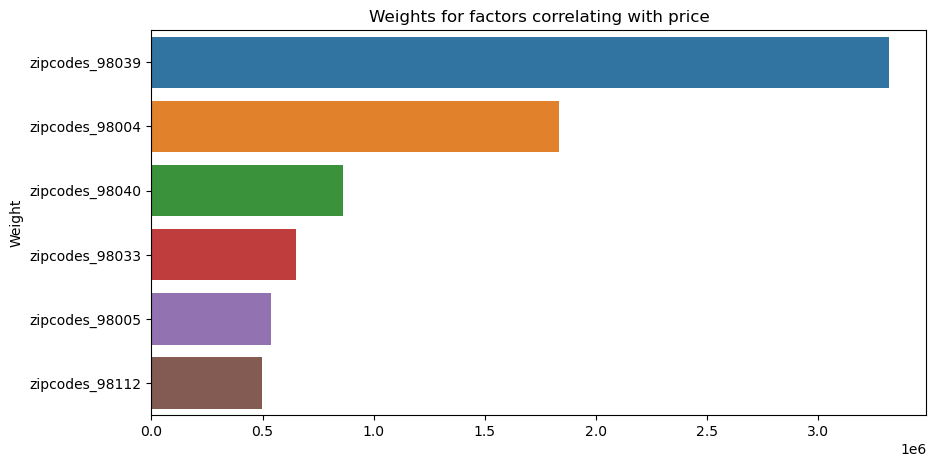

In [93]:
weights = results.params
weights

# sort the weights
sorted_weights = weights.sort_values(ascending=False)
sorted_weights = sorted_weights[~sorted_weights.index.str.startswith('x')]
sorted_weights = sorted_weights[~sorted_weights.index.str.startswith('con')]
sorted_weights = sorted_weights[~sorted_weights.index.str.startswith('ind')]

top_10 = sorted_weights[:6]

# plot
plt.figure(figsize=(10,5))
sns.barplot(y = top_10.index, x = top_10.values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()

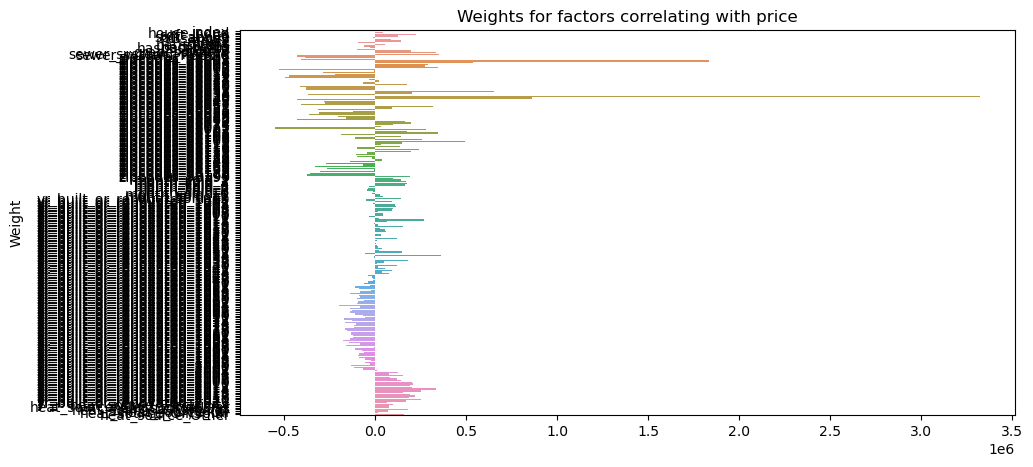

In [94]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()

In [95]:
has basement vs doesnt have basement

SyntaxError: invalid syntax (3213340080.py, line 1)

In [ ]:
sns.pairplot(X_dfstan_train)

In [ ]:
df['bathrooms'].value_counts()

In [ ]:
df1.columns

In [498]:
col_selector = ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 
                'zipcodes', 'nuisance2', 'view2', 'wf2',  'floors', 'bedtobath',  'month_sold', 'yr_built_or_renovated', 'yr_built','RBoR2', 'greenbelt2',
                'hasbasement', 'gradesquared',]
X = df1[col_selector]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [501]:
numeric_cols= ['house_cond', 'sqft_living', 'sqft_above', 
                 'nuisance2', 'view2', 'wf2',  'floors', 'bathrooms', 'bedrooms',
                     'hasbasement', 'RBoR2','gradesquared'
              ]
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import MaxAbsScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import PowerTransformer



# ss = preprocessing.StandardScaler()
# mms = preprocessing.MinMaxScaler()
# mas = preprocessing.MaxAbsScaler()
# qts = preprocessing.QuantileTransformer()
# ptbc = preprocessing.PowerTransformer(method = 'box-cox')
# ptyj = preprocessing.PowerTransformer(method = 'yeo-johnson')
# #method = 'box-cox' or 'yeo-johnson'

X_train = X_train[numeric_cols]
X_test = X_test[numeric_cols]

dfXsamp_train = pd.DataFrame(Xsamp_train, columns = numeric_cols)
dfXsamp_test = pd.DataFrame(Xsamp_test, columns = numeric_cols)



# X_nonstan_train = transform(X_train[numeric_cols])
# X_nonstan_test = transform(X_test[numeric_cols])

# X_dfnonstan_train = pd.DataFrame(X_nonstan_train, columns = numeric_cols)
# X_dfnonstan_test = pd.DataFrame(X_nonstan_test, columns = numeric_cols)
                              

nominal_cols = ['zipcodes', 'month_sold', 'yr_built_or_renovated']

ohe.fit(X_train[nominal_cols])
ohe_train = ohe.transform(X_train[nominal_cols])
ohe_test = ohe.transform(X_test[nominal_cols])


ohe_train= pd.DataFrame(ohe_train, columns = ohe.get_feature_names_out())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names_out())

In [ ]:
numeric_cols= ['house_cond', 'sqft_living', 'sqft_above', 
                 'nuisance2', 'view2', 'wf2',  'floors', 'bathrooms', 'bedrooms',
                     'hasbasement', 'RBoR2','gradesquared'
              ]



In [340]:
X_train_ohe2 =pd.concat([X_dfnonstan_train.reset_index(),
                        ohe_train],1)


X_test_ohe2 =pd.concat([X_dfnonstan_test.reset_index(),
                        ohe_test],1)

/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_16171/556974456.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_train_ohe2 =pd.concat([X_dfnonstan_train.reset_index(),
/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_16171/556974456.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_test_ohe2 =pd.concat([X_dfnonstan_test.reset_index(),


X_train_ohe2 =pd.concat([X_train.reset_index(),
                        ohe_train],1)


X_test_ohe2 =pd.concat([X_test.reset_index(),
                        ohe_test],1)

In [515]:
lr = LinearRegression()
lr.fit(X_train[numeric_cols], y_train)
# lr.score(X_train_ohe, y_train)

LinearRegression()

In [342]:
X_train_ohe2 = sm.add_constant(X_train_ohe2)
X_test_ohe2 = sm.add_constant(X_test_ohe2)

# reset the index of y_train
y_train_reset = y_train.reset_index(drop=True)

model = sm.OLS(y_train_reset, X_train_ohe2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     185.6
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:41:26   Log-Likelihood:            -2.9572e+05
No. Observations:               20264   AIC:                         5.919e+05
Df Residuals:                   20045   BIC:                         5.936e+05
Df Model:                         218                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [530]:
examp_idx = 45
single_examp_dict= X_test.iloc[examp_idx].to_dict
X_test.iloc[examp_idx]

house_cond                 2.0
grade2                     5.0
sqft_living               1960
sqft_above                1160
sqft_basement              860
bedrooms                     3
bathrooms                  2.0
zipcodes                 98107
nuisance2                  0.0
view2                      0.0
wf2                        0.0
floors                     1.5
bedtobath                  6.0
month_sold                   7
yr_built_or_renovated     1944
yr_built                  1944
RBoR2                      0.0
greenbelt2                 0.0
hasbasement               True
gradesquared              25.0
Name: 25403, dtype: object

In [513]:
df1.iloc[examp_idx]

index                                                                      33
id                                                                 6450304798
date                                                      2021-08-20 00:00:00
price                                                                730000.0
bedrooms                                                                    3
bathrooms                                                                 2.0
sqft_living                                                              1570
sqft_lot                                                                 1184
floors                                                                    3.0
waterfront                                                                 NO
greenbelt                                                                  NO
nuisance                                                                   NO
view                                                            

In [533]:
X_test_dict = X_test.iloc[examp_idx]
X_test_dict

house_cond                 2.0
grade2                     5.0
sqft_living               1960
sqft_above                1160
sqft_basement              860
bedrooms                     3
bathrooms                  2.0
zipcodes                 98107
nuisance2                  0.0
view2                      0.0
wf2                        0.0
floors                     1.5
bedtobath                  6.0
month_sold                   7
yr_built_or_renovated     1944
yr_built                  1944
RBoR2                      0.0
greenbelt2                 0.0
hasbasement               True
gradesquared              25.0
Name: 25403, dtype: object

In [535]:
X_test_dict = dict(X_test_dict) #bedrooms 3 to 3.5
X_test_dict

{'house_cond': 2.0,
 'grade2': 5.0,
 'sqft_living': 1960,
 'sqft_above': 1160,
 'sqft_basement': 860,
 'bedrooms': 3,
 'bathrooms': 2.0,
 'zipcodes': 98107,
 'nuisance2': 0.0,
 'view2': 0.0,
 'wf2': 0.0,
 'floors': 1.5,
 'bedtobath': 6.0,
 'month_sold': 7,
 'yr_built_or_renovated': 1944,
 'yr_built': 1944,
 'RBoR2': 0.0,
 'greenbelt2': 0.0,
 'hasbasement': True,
 'gradesquared': 25.0}

In [536]:
# X_test_dict = {'house_cond': 2.0,
#  'grade2': 5.0,
#  'sqft_living': 1960,
#  'sqft_above': 1160,
#  'sqft_basement': 860,
#  'bedrooms': 3,
#  'bathrooms': 2.0,
#  'zipcodes': 98107,
#  'nuisance2': 0.0,
#  'view2': 0.0,
#  'wf2': 0.0,
#  'floors': 1.5,
#  'bedtobath': 6.0,
#  'month_sold': 7,
#  'yr_built_or_renovated': 1944,
#  'yr_built': 1944,
#  'RBoR2': 0.0,
#  'greenbelt2': 0.0,
#  'hasbasement': True,
#  'gradesquared': 25.0}}

In [537]:
X_test_ser = pd.Series(X_test_dict)

In [538]:
X_test_np = X_test_ser.values

In [539]:
X_test_input = X_test_np.reshape(1,-1)

In [540]:
lr.predict(X_test_input)

/Users/forrestwilliams/anaconda3/envs/wheelydope/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 20 features, but LinearRegression is expecting 12 features as input.

In [404]:
X_test_dict

{'house_cond': 2.0,
 'grade2': 5.0,
 'sqft_living': 2270,
 'sqft_above': 1340,
 'sqft_basement': 1340,
 'bedrooms': 4,
 'bathrooms': 2,
 'zipcodes': 98125,
 'nuisance2': 1.0,
 'view2': 0.0,
 'wf2': 0.0,
 'floors': 1.0,
 'bedtobath': 15.0,
 'month_sold': 8,
 'yr_built_or_renovated': 1995,
 'yr_built': 1995,
 'RBoR2': 0.0,
 'greenbelt2': 0.0,
 'hasbasement': True,
 'gradesquared': 25.0}

In [463]:
X_test_dict2 = {'house_cond': 2.0,
 'grade2': 5.5,
 'sqft_living': 2470,
 'sqft_above': 1340,
 'sqft_basement': 1340,
 'bedrooms': 3,
 'bathrooms': 2,
 'zipcodes': 98125,
 'nuisance2': 1.0,
 'view2': 0.0,
 'wf2': 0.0,
 'floors': 1.0,
 'bedtobath': 15.0,
 'month_sold': 8,
 'yr_built_or_renovated': 1995,
 'yr_built': 1995,
 'RBoR2': 0.0,
 'greenbelt2': 0.0,
 'hasbasement': True,
 'gradesquared': 25.0}

In [464]:
X_test_ser2 = pd.Series(X_test_dict2)

In [465]:
X_test_np2 = X_test_ser2.values

In [466]:
X_test_input2 = X_test_np2.reshape(1,-1)

In [467]:
lr.predict(X_test_input2)

/Users/forrestwilliams/anaconda3/envs/wheelydope/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([747086.14043772])

In [447]:
df.grade.value_counts()

7 Average        11501
8 Good            8737
9 Better          3558
6 Low Average     2828
10 Very Good      1346
11 Excellent       402
5 Fair             381
12 Luxury          121
4 Low               42
13 Mansion          24
3 Poor               8
2 Substandard        1
Name: grade, dtype: int64

In [ ]:
df['heat_source']

from sklearn.preprocessing import PolynomialFeatures

# Create PolynomialFeatures object
poly = PolynomialFeatures(degree=2, include_bias=False)

# Let's say 'bathrooms' and 'sqft_living' are the columns you're interested in
selected_features = df[['bathrooms', 'sqft_living']]

# Fit and transform the data to generate polynomial features
poly_features = poly.fit_transform(selected_features)

# The output is a numpy array. We can convert it to DataFrame for better readability
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names(selected_features.columns))

#concat the dfs
df1 = pd.concat([df1, poly_features_df], axis=1)

print(df1)
 

from sklearn.preprocessing import PolynomialFeatures

# Create PolynomialFeatures object
poly = PolynomialFeatures(degree=2, include_bias=False)

# Let's say 'bathrooms' and 'sqft_living' are the columns you're interested in
selected_features = df[['bathrooms', 'bedrooms']]

# Fit and transform the data to generate polynomial features
poly_features = poly.fit_transform(selected_features)

# The output is a numpy array. We can convert it to DataFrame for better readability
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names(selected_features.columns))

#concat the dfs
df1 = pd.concat([df1, poly_features_df], axis=1)

print(df1.columns)
 

In [456]:
df['price'].describe()

count    2.894900e+04
mean     1.114820e+06
std      8.970962e+05
min      2.736000e+04
25%      6.470000e+05
50%      8.700000e+05
75%      1.314995e+06
max      3.075000e+07
Name: price, dtype: float64

In [459]:
df['grade'].value_counts()

7 Average        11501
8 Good            8737
9 Better          3558
6 Low Average     2828
10 Very Good      1346
11 Excellent       402
5 Fair             381
12 Luxury          121
4 Low               42
13 Mansion          24
3 Poor               8
2 Substandard        1
Name: grade, dtype: int64

In [460]:
df['condition'].value_counts()

Average      17385
Good          8033
Very Good     3251
Fair           220
Poor            60
Name: condition, dtype: int64